<a href="https://colab.research.google.com/github/somyakmukherjee/US-Home-Price-Prediction/blob/main/EDA_%26_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Ananlysis & Model Training for US Home Price**

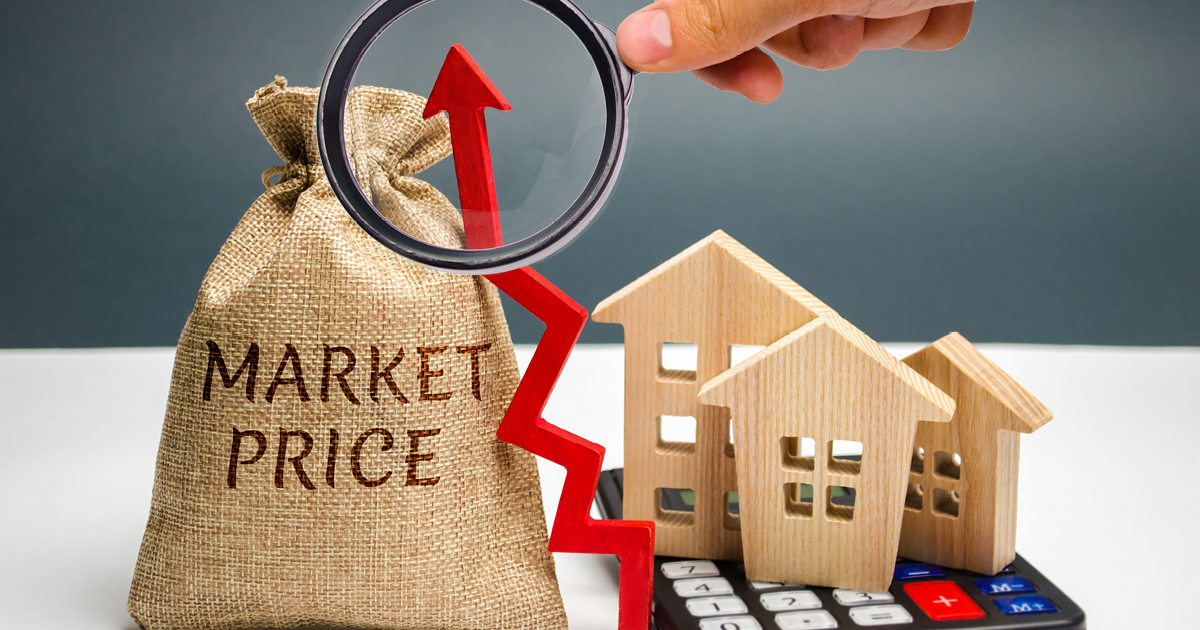

## **Project Scope:**
This project aims to build a data science model to predict U.S. home prices based on key economic factors over the last 20 years.

### **Steps**
1.Data Collection and Preparation:

*   Gather historical data for the specified features.
*   Clean and preprocess the data for analysis.

2. Exploratory Data Analysis (EDA):

*   Visualize relationships between features and CSUSHPISA.
*   Identify correlations and patterns.

3. Model Development:

*  Build predictive models using regression or machine learning algorithms.
*  Train and validate the models.

4. Model Evaluation:


*   Evaluate model performance using appropriate metrics.
*   Fine-tune models for better accuracy.

## **Factors chosen & Data Collection Sources**

1. **USHPI (S&P/Case-Shiller U.S. National Home Price Index.**) https://fred.stlouisfed.org/series/CSUSHPINSA
2. **Population** (Population includes resident population plus armed forces overseas.  The monthly estimate is the average of estimates for the first of the month and the first of the following month.) https://fred.stlouisfed.org/series/POPTHM
3. **Personal Income** (It is the income that persons receive in return for their provision of labor, land, and capital used in current production and the net current transfer payments that they receive from business and from government.) https://fred.stlouisfed.org/series/PI
4. **Gross Domestic Product** (Featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.) https://fred.stlouisfed.org/series/GDP
5. **Unemployment Rate** (The unemployment rate represents the number of unemployed as a percentage of the labor force. (16 years age or above)) https://fred.stlouisfed.org/series/UNRATE
6. **Employment-Population Ratio:** (It is a macroeconomic statistic that measures the civilian labor force currently employed against the totalworking-age populationof a region, municipality, or country. (emratio)) https://fred.stlouisfed.org/series/EMRATIO https://www.investopedia.com/terms/e/employment_to_population_ratio.asp
7. **Building Construction issued permit** in US (Total Units) https://fred.stlouisfed.org/series/PERMIT
8. **Labor Force Participation Rate** (The participation rate is the percentage of the population that is either working or actively looking for work.) https://fred.stlouisfed.org/series/CIVPART https://www.investopedia.com/terms/p/participationrate.asp
9. **Monthly Supply of New Houses** in the United States (The monthly supply is the ratio of new houses for sale to new houses sold.) https://fred.stlouisfed.org/series/MSACSR
10.**Housing starts**(New Housing Project) (This is a measure of the number of units of new housing projects started in a given period.) https://fred.stlouisfed.org/series/HOUST
11. **Median Sales Price**. (Median Sales Price of Houses Sold for the United States.(US Dollers)) https://fred.stlouisfed.org/series/MSPUS
12.**Producer Price Index -Cement Manufacturing** https://fred.stlouisfed.org/series/PCU327310327310
13. **Producer Price Index by Industry: Concrete Block and Brick Manufacturing** https://fred.stlouisfed.org/series/PCU32733132733106
14. **All Employees, Residential Building Construction** (Thousands of Peoples) (Construction employees in the construction sector include: Working supervisors, qualified craft workers, mechanics, apprentices, helpers, laborers, and so forth, engaged in new work, alterations, demolition, repair, maintenance etc.) https://fred.stlouisfed.org/series/CES2023610001
15. **All Employees, Construction**(Thousands of persons) (Construction employees in the construction sector include: Working supervisors, qualified craft workers, mechanics, apprentices, helpers, laborers, and so forth, engaged in new work, alterations, demolition, repair, maintenance.) https://fred.stlouisfed.org/series/USCONS
16. **Industrial Production: Cement** (The industrial production (IP) index measures the real output of all relevant establishments located in the United States) https://fred.stlouisfed.org/series/IPN32731S https://www.investopedia.com/terms/i/ipi.asp
17. **Homeownership Rate (Percentage)** (The homeownership rate is the proportion of households that is owner-occupied.)
https://fred.stlouisfed.org/series/RSAHORUSQ156S
18. **Personal Saving Rate** (Percent) (Personal saving as a percentage of disposable personal income (DPI), frequently referred to as "the personal saving rate," is calculated as the ratio of personal saving to DPI. Personal income that is used either to provide funds to capital markets or to invest in real assets such as residences.)
https://fred.stlouisfed.org/series/PSAVERT
19. **New Privately-Owned Housing Units Completed**: (Total units in thousands) https://fred.stlouisfed.org/series/COMPUTSA
20. **New Privately-Owned Housing Units Under Construction**: (Total Units in thousands)
https://fred.stlouisfed.org/series/UNDCONTSA

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading ushomeprice data
df_final = pd.read_csv("ushomepricedataset.csv")

In [ ]:
df_final.head()

,DATE,GDP,permit,house_st,IPI_Cement,unemployed_rate,MSPUS,all_const_emp,PPI_Concrete,monthly_supply,...,p_saving_rate,ushpi,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
0,1990-01-01,5872.701,1748.0,1551.0,138.1363,5.4,123900.0,710.3,122.2,7.0,...,7.9,76.527,1508.0,891.0,63.2,66.8,248743.0,64.1,101.7,4783.8
1,1990-02-01,5872.701,1329.0,1437.0,134.7538,5.3,123900.0,707.3,122.2,7.6,...,8.5,76.587,1352.0,898.0,63.2,66.7,248920.0,64.1,101.7,4819.8
2,1990-03-01,5872.701,1246.0,1289.0,132.5115,5.2,123900.0,703.0,122.2,7.8,...,8.3,76.790,1345.0,885.0,63.2,66.7,249146.0,64.1,102.0,4842.7
3,1990-04-01,5960.028,1136.0,1248.0,127.1853,5.4,126800.0,692.5,122.2,8.3,...,8.7,77.038,1332.0,872.0,63.0,66.6,249436.0,63.9,102.5,4883.8
4,1990-05-01,5960.028,1067.0,1212.0,123.8842,5.4,126800.0,688.6,122.2,8.2,...,8.7,77.297,1351.0,858.0,63.1,66.6,249707.0,63.9,102.5,4889.5


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  397 non-null    object 
 1   GDP                   397 non-null    float64
 2   permit                397 non-null    float64
 3   house_st              397 non-null    float64
 4   IPI_Cement            397 non-null    float64
 5   unemployed_rate       397 non-null    float64
 6   MSPUS                 397 non-null    float64
 7   all_const_emp         397 non-null    float64
 8   PPI_Concrete          397 non-null    float64
 9   monthly_supply        397 non-null    float64
 10  total_emp_cons        397 non-null    float64
 11  p_saving_rate         397 non-null    float64
 12  ushpi                 397 non-null    float64
 13  new_private_house     397 non-null    float64
 14  new_private_hw_under  397 non-null    float64
 15  emp_pop_ratio         3

In [ ]:
df_final.describe()

,GDP,permit,house_st,IPI_Cement,unemployed_rate,MSPUS,all_const_emp,PPI_Concrete,monthly_supply,total_emp_cons,p_saving_rate,ushpi,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,13751.981048,1345.279597,1320.732997,119.677202,5.822922,226608.060453,740.506045,182.777917,5.796977,6361.360202,6.195214,145.071662,1276.730479,940.282116,61.287657,65.073552,297096.035264,65.945592,181.415662,11620.307053
std,5435.621657,408.278555,392.827653,24.924897,1.736042,85066.969373,127.952246,46.922703,1.789995,930.547074,2.971523,56.225188,360.766637,289.655762,2.144684,1.830847,25711.546578,1.735259,52.293243,4826.495221
min,5872.701000,513.000000,478.000000,66.350800,3.400000,117000.000000,542.600000,122.200000,3.300000,4570.000000,1.400000,75.137000,520.000000,414.000000,51.300000,60.100000,248743.000000,63.100000,101.700000,4783.800000
25%,8969.699000,1067.000000,1079.000000,100.574700,4.600000,152200.000000,628.600000,141.900000,4.400000,5584.000000,4.800000,88.558000,1061.000000,732.000000,59.600000,63.000000,275434.000000,64.200000,144.000000,7501.700000
50%,13870.188000,1353.000000,1340.000000,112.752200,5.500000,222900.000000,739.400000,169.400000,5.400000,6586.000000,5.900000,144.310000,1298.000000,970.000000,61.800000,66.000000,298910.000000,65.600000,185.800000,11322.100000
75%,17912.079000,1647.000000,1582.000000,141.713100,6.700000,289100.000000,828.000000,207.000000,6.700000,7153.000000,7.000000,180.343000,1521.000000,1127.000000,62.900000,66.600000,320403.000000,67.500000,210.500000,15022.700000
max,26813.601000,2263.000000,2273.000000,192.032200,14.700000,479500.000000,1022.000000,331.353000,12.200000,7885.000000,32.000000,308.266000,2245.000000,1710.000000,64.700000,67.300000,334533.000000,69.400000,322.376000,24471.800000


In [ ]:
df_final.isna().sum()

DATE                    0
GDP                     0
permit                  0
house_st                0
IPI_Cement              0
unemployed_rate         0
MSPUS                   0
all_const_emp           0
PPI_Concrete            0
monthly_supply          0
total_emp_cons          0
p_saving_rate           0
ushpi                   0
new_private_house       0
new_private_hw_under    0
emp_pop_ratio           0
labor_percent           0
population              0
home_ow_rate            0
PPI_Cement              0
income                  0
dtype: int64

## **Histograms and Kernel Density Plots**

A histogram is a graphical representation of the distribution of a dataset. It is used to visualize the underlying frequency distribution of a set of continuous or discrete data.

A kernel density plot, or kernel density estimate (KDE), is another way to visualize the distribution of a dataset. It provides a smooth curve that represents the estimated probability density function of the data.

In [ ]:
factors = df_final.columns

<Figure size 2200x1200 with 0 Axes>

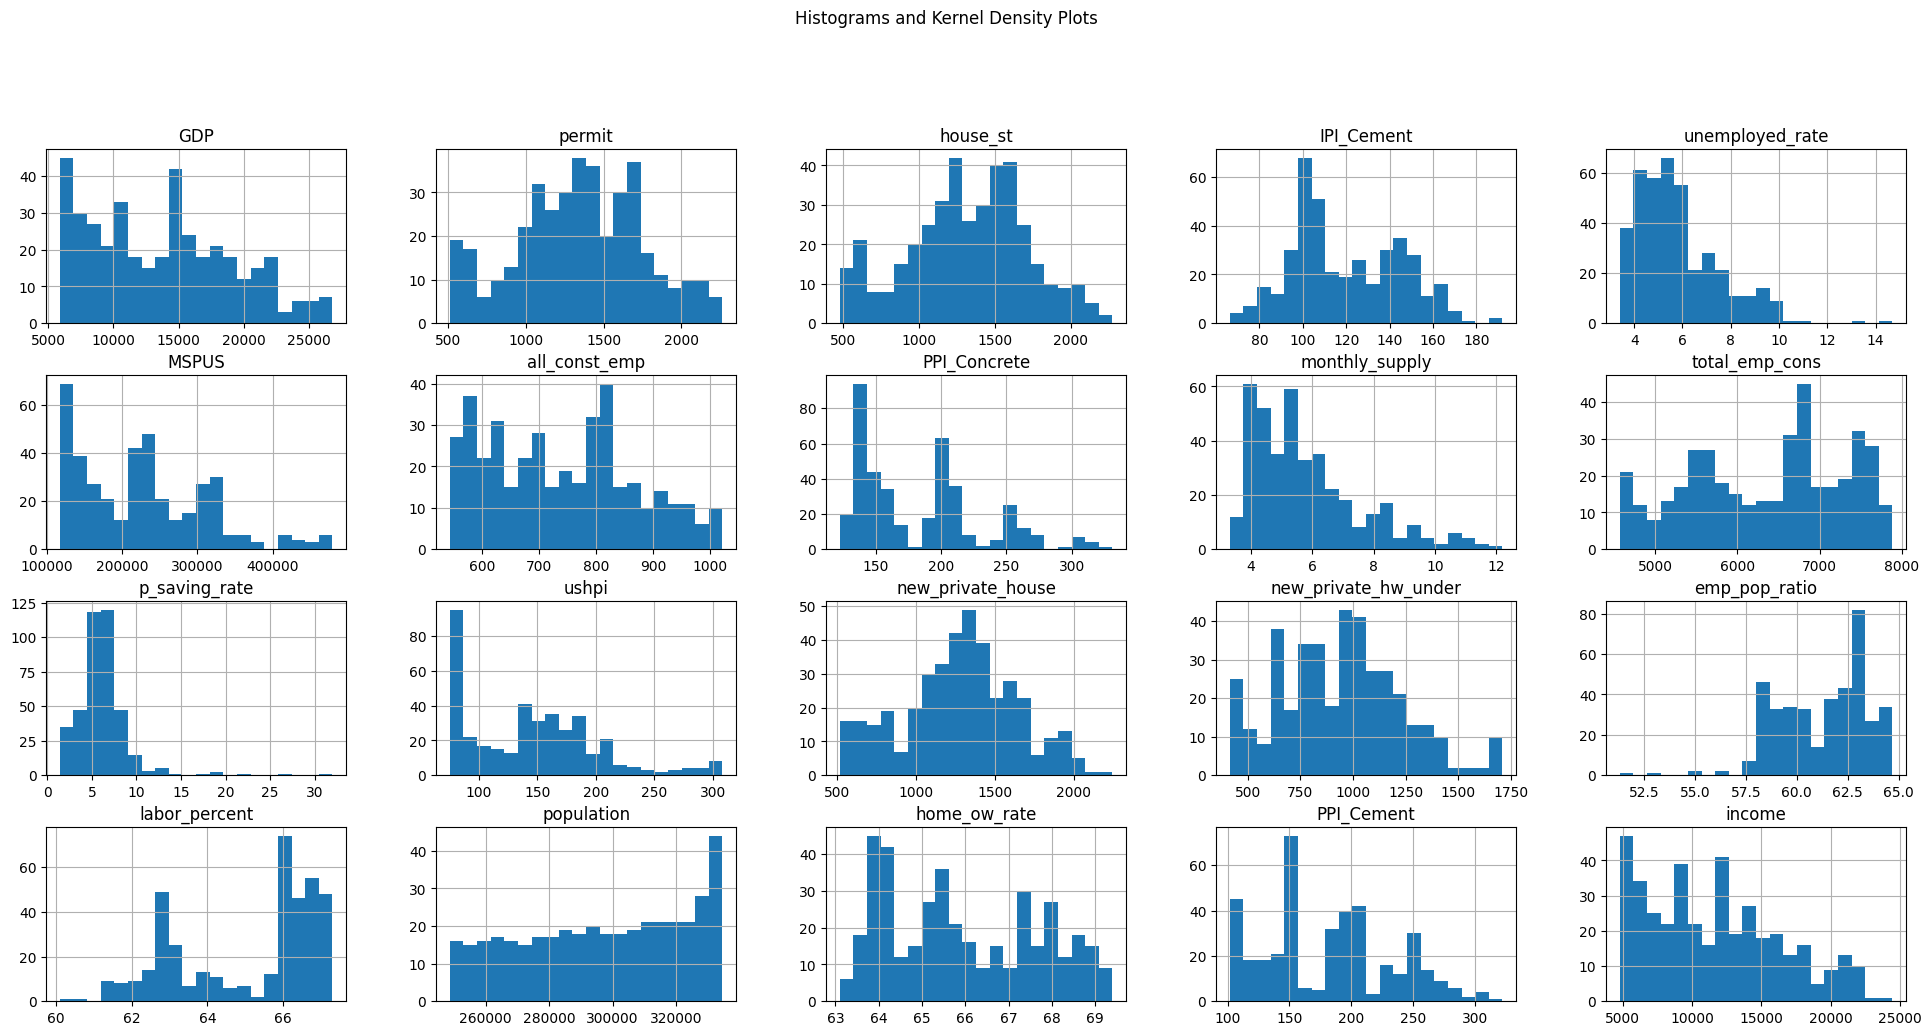

In [ ]:
#Plotting Histograms and Kernel Density Plots
plt.figure(figsize=(22, 12))
df_final[factors].hist(bins=20, alpha=1, layout=(5, 5), figsize=(24, 14))
plt.suptitle('Histograms and Kernel Density Plots')
plt.show()

## **Box Plot**

A boxplot (or box-and-whisker plot) is a graphical representation of the distribution of a dataset. It provides a summary of the key statistical measures of a dataset, revealing information about its central tendency and spread.

Boxplots are especially handy for comparing distributions between different groups or variables. They provide a concise visual summary of the distribution and help identify potential outliers.

In [ ]:
df_final.columns

Index(['DATE', 'GDP', 'permit', 'house_st', 'IPI_Cement', 'unemployed_rate',
       'MSPUS', 'all_const_emp', 'PPI_Concrete', 'monthly_supply',
       'total_emp_cons', 'p_saving_rate', 'ushpi', 'new_private_house',
       'new_private_hw_under', 'emp_pop_ratio', 'labor_percent', 'population',
       'home_ow_rate', 'PPI_Cement', 'income'],
      dtype='object')

In [ ]:
cols = ['GDP', 'permit', 'house_st', 'ushpi', 'IPI_Cement',
       'all_const_emp', 'unemployed_rate', 'MSPUS', 'PPI_Concrete',
       'monthly_supply', 'total_emp_cons', 'p_saving_rate',
       'new_private_house', 'new_private_hw_under', 'emp_pop_ratio',
       'labor_percent', 'population', 'home_ow_rate', 'PPI_Cement', 'income']

<Figure size 1200x600 with 0 Axes>

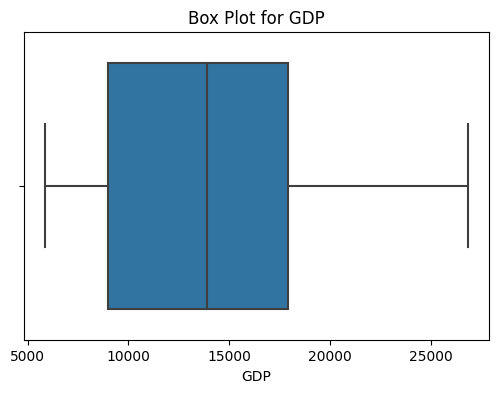

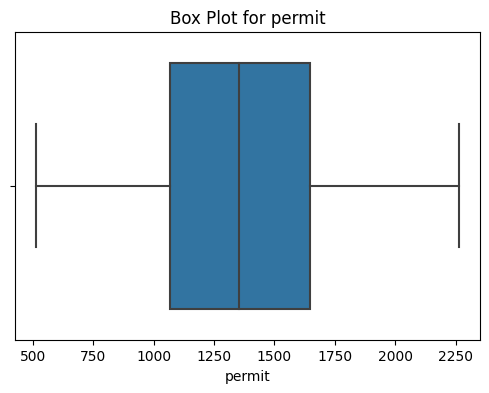

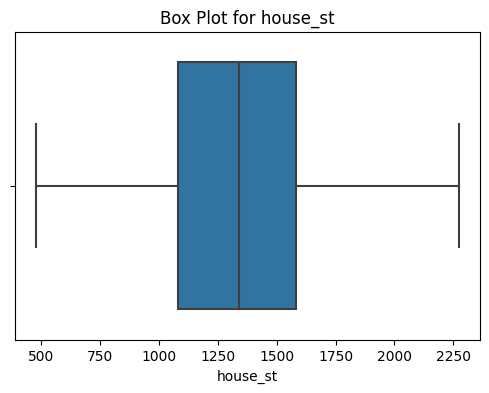

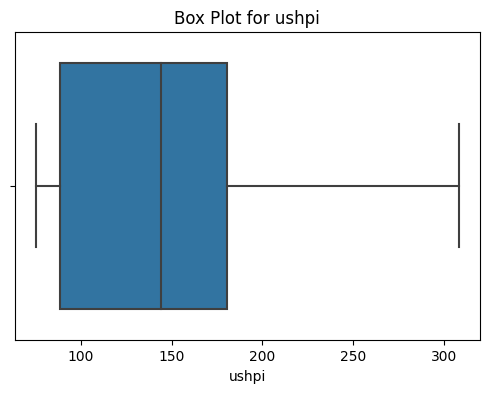

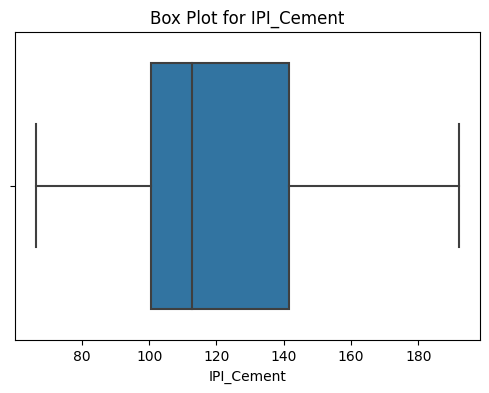

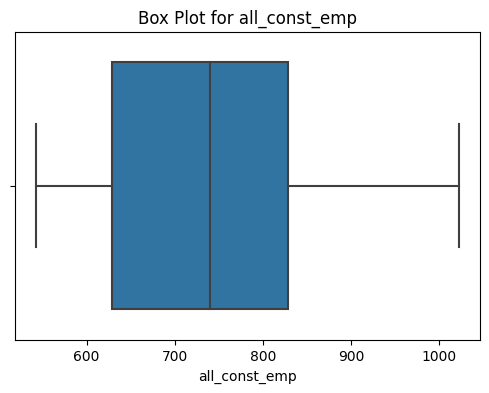

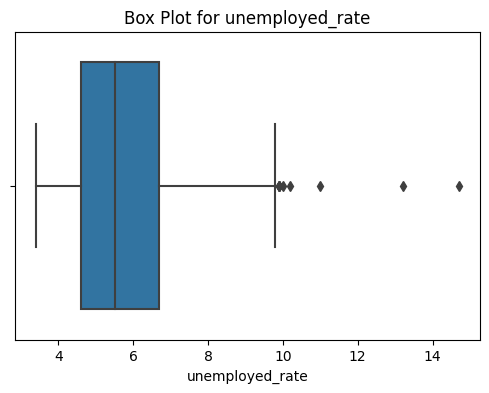

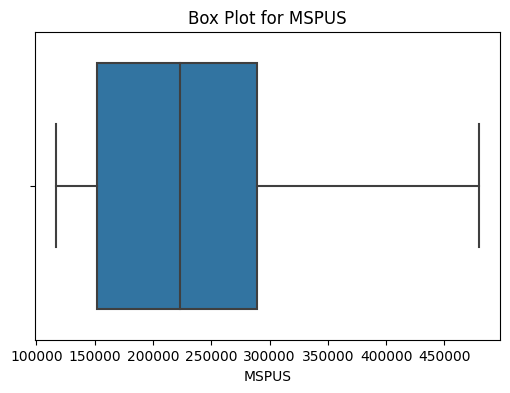

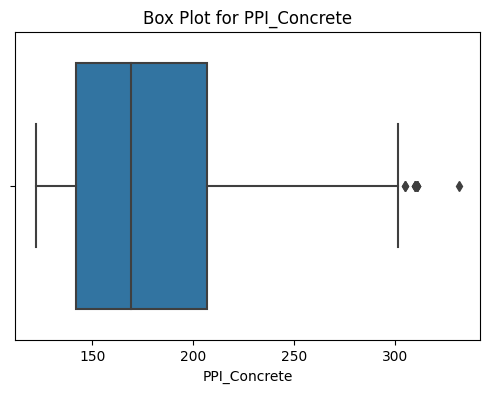

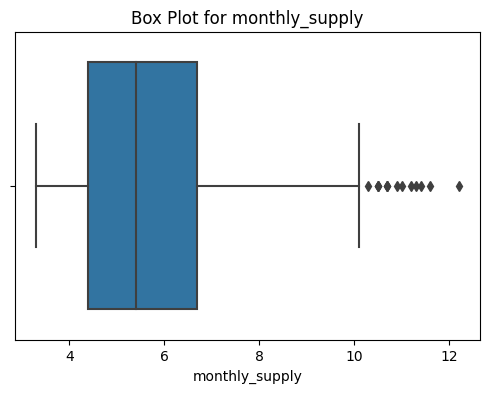

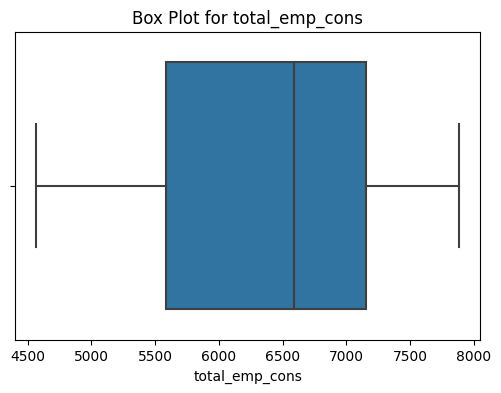

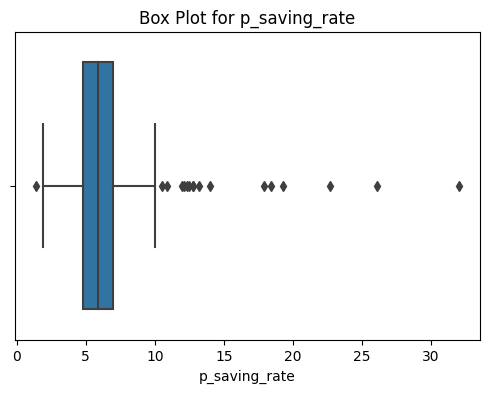

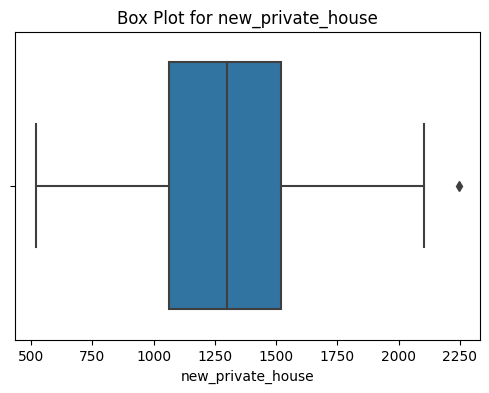

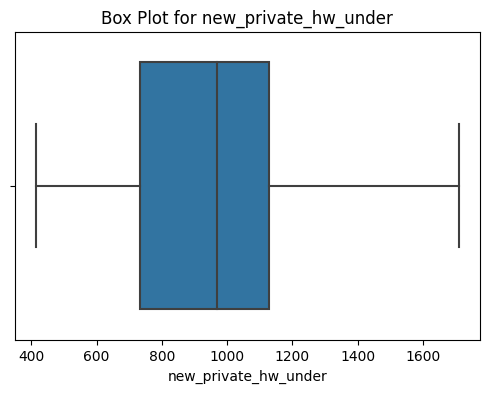

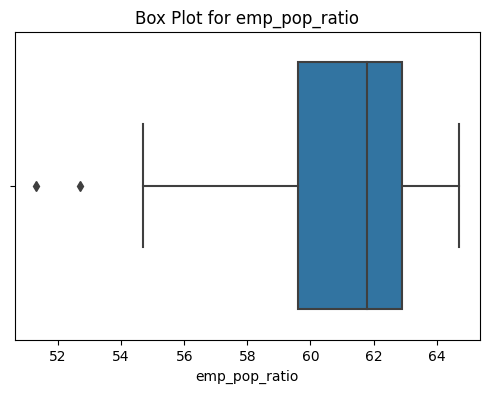

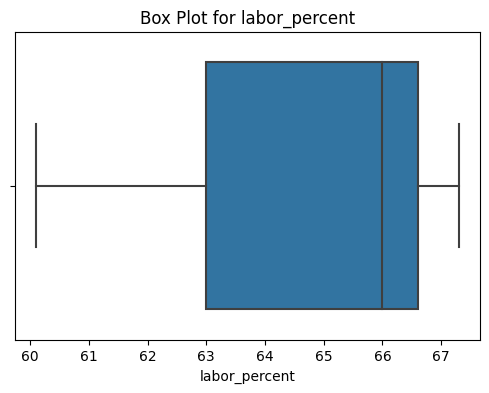

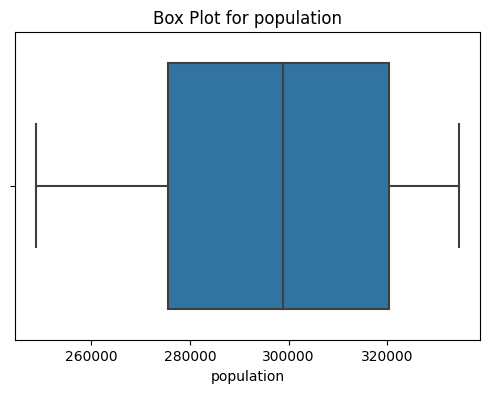

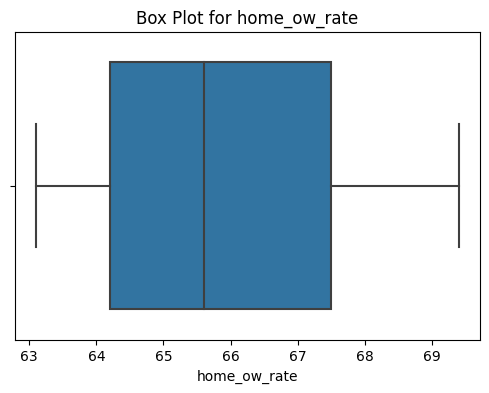

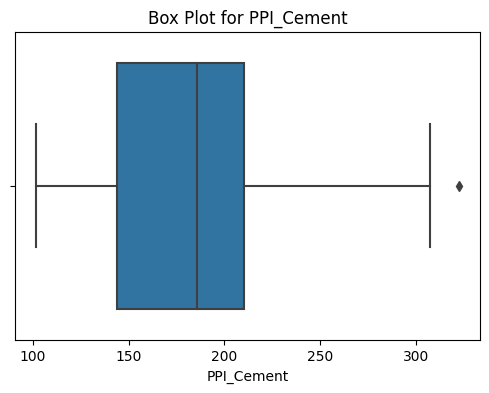

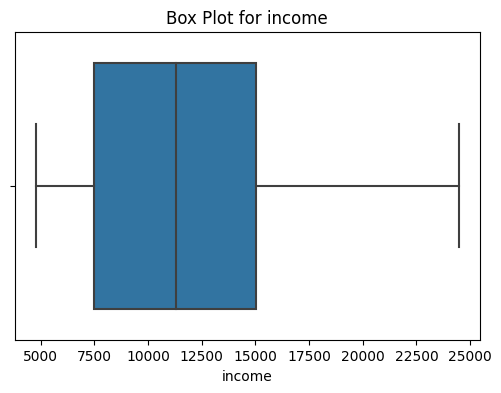

In [ ]:
#plotting boxplot
plt.figure(figsize=(12, 6))
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

From the above boxplot, we can say that we have outliers in few features:

1. p_saving_rate
2. PPI_Concrete
3. new_private_house
4. emp_pop_ratio
5. new_private_hw_under
6. monthly_supply
7. unemployed_rate

## **Treating Skewness and Outliers:**

To ensure that the machine learning model capabilities is not affected, skewed data has to be transformed to approximate to a normal distribution. The method used to transform the skewed data depends on the characteristics of the data.

1. Log Transformation: Logarithmic transformation is effective when the data is right-skewed.

2. Square Root Transformation: Square root transformation is another option for reducing right-skewness.

3. Box-Cox Transformation: The Box-Cox transformation is a family of power transformations that includes the logarithm and square root as special cases. It can handle both positive and zero values.

One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.

1. Truncation/Clipping: Set a threshold and cap values beyond that threshold.

2. Winsorization: Similar to clipping, but instead of directly capping values, replace them with the closest values within the threshold.

3. Z-Score Method: Identify and remove data points that fall beyond a certain number of standard deviations from the mean.

4. IQR (Interquartile Range) Method: Similar to the Z-Score method, but using the IQR to identify and remove outliers.

### **p_saving_rate**

In [ ]:
df_final['p_saving_rate'].skew()

3.480618257157752

Personal saving rate column is highly right skewed. Hence we will apply IQR method for handling outliers.

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["p_saving_rate"].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1.4999999999999996
10.3


In [ ]:
# capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

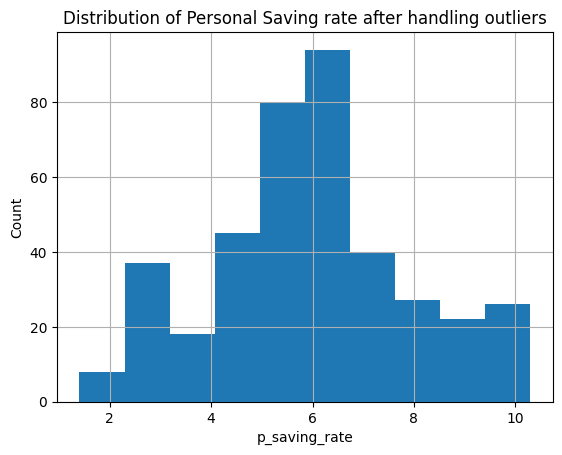

In [ ]:
#Distribution of Personal Saving rate after handling outliers
df_final['p_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()

### **PPI_Concrete**

In [ ]:
df_final['PPI_Concrete'].skew()

0.8644288302486635

Producer price index of concrete column is highly right skewed. Hence we will apply Log transformation for handling skewness first.

<Axes: >

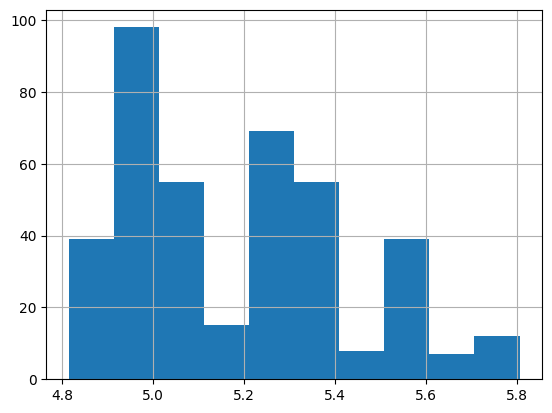

In [ ]:
#Applying log transformation & plotting it in histogram
df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])
df_final['PPI_Concrete'].hist()

Hence, we can see that skewness and outliers both removed by using log transformation.

In [ ]:
df_final['new_private_house'].skew()

-0.07550482518858308

New private house completely constructed units- column is negatively skewed and having outliers in the maximum side. We are going to apply Yeo-Johnson Power Transformation for removing skewness.

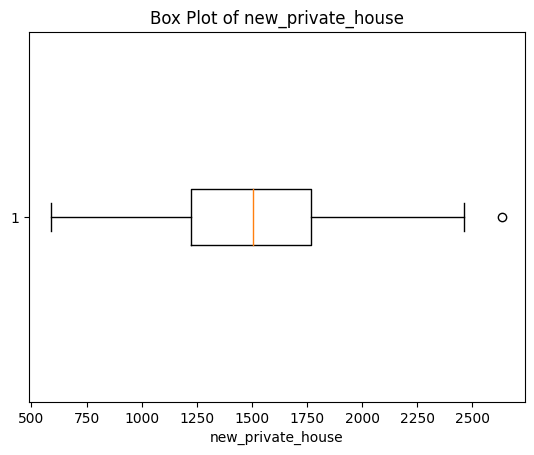

In [ ]:
from scipy import stats

transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data

plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('new_private_house')
plt.title('Box Plot of new_private_house')
plt.show()

In [ ]:
max_value = df_final['new_private_house'].max()
df_final['new_private_house'] = np.where(df_final['new_private_house'] > max_value, max_value, df_final['new_private_house'])

### **Employment population ratio**

In [ ]:
df_final['emp_pop_ratio'].skew()

-0.6687196199299327

Employment population ratio column is negatively skewed and having outliers in the minimum side. We are going to apply IQR method for handling outliers.

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emp_pop_ratio"].quantile(0.25)
q2 = df_final["emp_pop_ratio"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

54.650000000000006
67.85


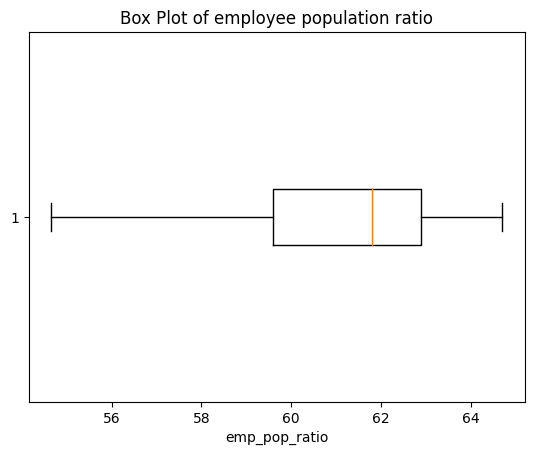

In [ ]:
df_final.loc[df_final['emp_pop_ratio'] <=lower_bridge,'emp_pop_ratio'] = lower_bridge

plt.boxplot(df_final['emp_pop_ratio'], vert=False)
plt.xlabel('emp_pop_ratio')
plt.title('Box Plot of employee population ratio')
plt.show()

### **New private house units under contruction**

In [ ]:
df_final['new_private_hw_under'].skew()

0.3020647229322847

New private house units under contruction column is right skewed. We will apply IQR Method to deal with the outliers.

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

139.5
1719.5


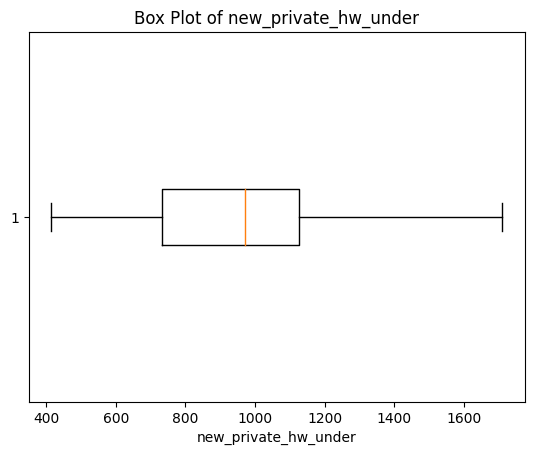

In [ ]:
df_final.loc[df_final['new_private_hw_under'] >=upper_bridge,'new_private_hw_under'] = upper_bridge

plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('new_private_hw_under')
plt.title('Box Plot of new_private_hw_under')
plt.show()

### **Monthly supply of houses**

In [ ]:
df_final['monthly_supply'].skew()

1.1533510707447518

Monthly supply of houses column is right skewed. We will apply IQR Method to deal with the outliers.

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

0.9500000000000006
10.15


<Axes: >

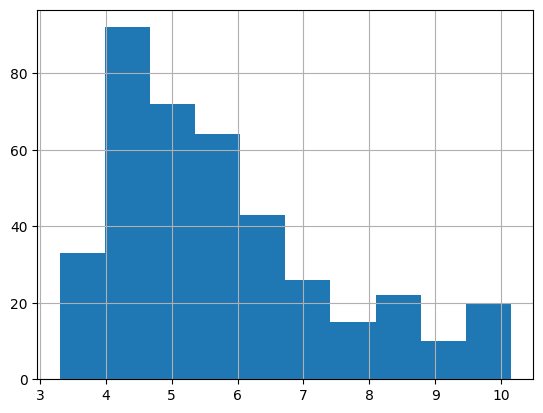

In [ ]:
df_final.loc[df_final['monthly_supply'] >=upper_bridge,'monthly_supply'] = upper_bridge
df_final['monthly_supply'].hist()

### **Unemployment Rate**

In [ ]:
df_final['unemployed_rate'].skew()

1.224584308452152

Unemployment rate column is right skewed. We will apply IQR Method to deal with the outliers.

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1.4499999999999988
9.850000000000001


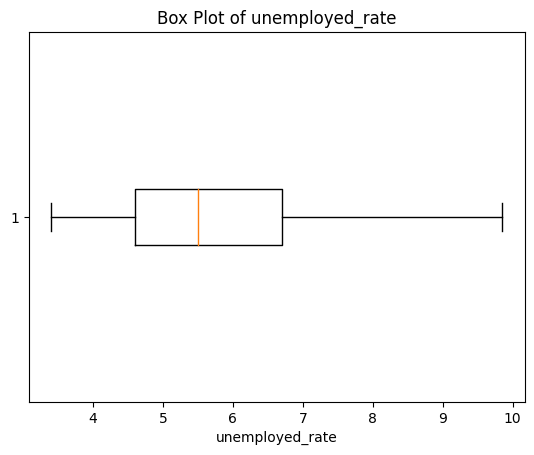

In [ ]:
df_final.loc[df_final['unemployed_rate'] >=upper_bridge,'unemployed_rate'] = upper_bridge

plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('unemployed_rate')
plt.title('Box Plot of unemployed_rate')
plt.show()

### **Correlation Analysis:**
Calculate the correlation matrix to measure the linear relationships between variables.

In [ ]:
# Correlation matrix
corr_matrix = df_final.corr()
corr_matrix

<ipython-input-34-9c3e75f219bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_final.corr()


,GDP,permit,house_st,IPI_Cement,unemployed_rate,MSPUS,all_const_emp,PPI_Concrete,monthly_supply,total_emp_cons,p_saving_rate,ushpi,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
GDP,1.000000,-0.019892,-0.148495,-0.425721,-0.142790,0.982567,0.368357,0.986831,0.153064,0.672239,-0.127274,0.952614,-0.245175,0.469535,-0.674295,-0.900509,0.972901,-0.049057,0.983585,0.995133
permit,-0.019892,1.000000,0.975229,0.756500,-0.646568,0.087223,0.753607,-0.122173,-0.524156,0.535597,-0.346830,0.162787,0.898709,0.766118,0.500506,0.203679,-0.067399,0.435154,-0.011111,-0.019908
house_st,-0.148495,0.975229,1.000000,0.794962,-0.638385,-0.037944,0.688467,-0.244598,-0.521515,0.431654,-0.311800,0.038691,0.919345,0.702907,0.586654,0.313371,-0.201587,0.398654,-0.136572,-0.147970
IPI_Cement,-0.425721,0.756500,0.794962,1.000000,-0.507953,-0.349200,0.608302,-0.520950,-0.331162,0.318946,-0.492793,-0.242221,0.861852,0.438571,0.780195,0.625467,-0.400416,0.592864,-0.376620,-0.437917
unemployed_rate,-0.142790,-0.646568,-0.638385,-0.507953,1.000000,-0.221380,-0.654685,-0.056973,0.164945,-0.579375,0.383414,-0.230195,-0.621338,-0.709477,-0.561634,-0.063181,-0.059266,0.007299,-0.188464,-0.119176
MSPUS,0.982567,0.087223,-0.037944,-0.349200,-0.221380,1.000000,0.447622,0.960615,0.150465,0.702382,-0.163849,0.976881,-0.137299,0.578457,-0.617382,-0.879864,0.928450,-0.039721,0.967856,0.977020
all_const_emp,0.368357,0.753607,0.688467,0.608302,-0.654685,0.447622,1.000000,0.277742,-0.041786,0.908833,-0.589943,0.569529,0.749458,0.915203,0.295964,-0.046265,0.331193,0.600849,0.432756,0.354574
PPI_Concrete,0.986831,-0.122173,-0.244598,-0.520950,-0.056973,0.960615,0.277742,1.000000,0.230509,0.594711,-0.051083,0.929656,-0.331141,0.394458,-0.727375,-0.910922,0.954342,-0.101836,0.975903,0.986266
monthly_supply,0.153064,-0.524156,-0.521515,-0.331162,0.164945,0.150465,-0.041786,0.230509,1.000000,0.007576,-0.082638,0.213615,-0.319909,-0.056414,-0.161074,-0.088252,0.091624,-0.046937,0.224151,0.135568
total_emp_cons,0.672239,0.535597,0.431654,0.318946,-0.579375,0.702382,0.908833,0.594711,0.007576,1.000000,-0.534690,0.779245,0.456732,0.847111,-0.000936,-0.358082,0.662792,0.481415,0.725967,0.659318


In [ ]:
# Sort correlations in descending order
corr_matrix= df_final.corr()
corr_matrix['ushpi'].sort_values(ascending=False)

<ipython-input-35-fafe303b454e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df_final.corr()


ushpi                   1.000000
MSPUS                   0.976881
PPI_Cement              0.955342
GDP                     0.952614
income                  0.946638
PPI_Concrete            0.929656
population              0.895138
total_emp_cons          0.779245
new_private_hw_under    0.662241
all_const_emp           0.569529
monthly_supply          0.213615
permit                  0.162787
home_ow_rate            0.112943
house_st                0.038691
new_private_house      -0.019483
unemployed_rate        -0.230195
p_saving_rate          -0.237831
IPI_Cement             -0.242221
emp_pop_ratio          -0.546168
labor_percent          -0.798830
Name: ushpi, dtype: float64

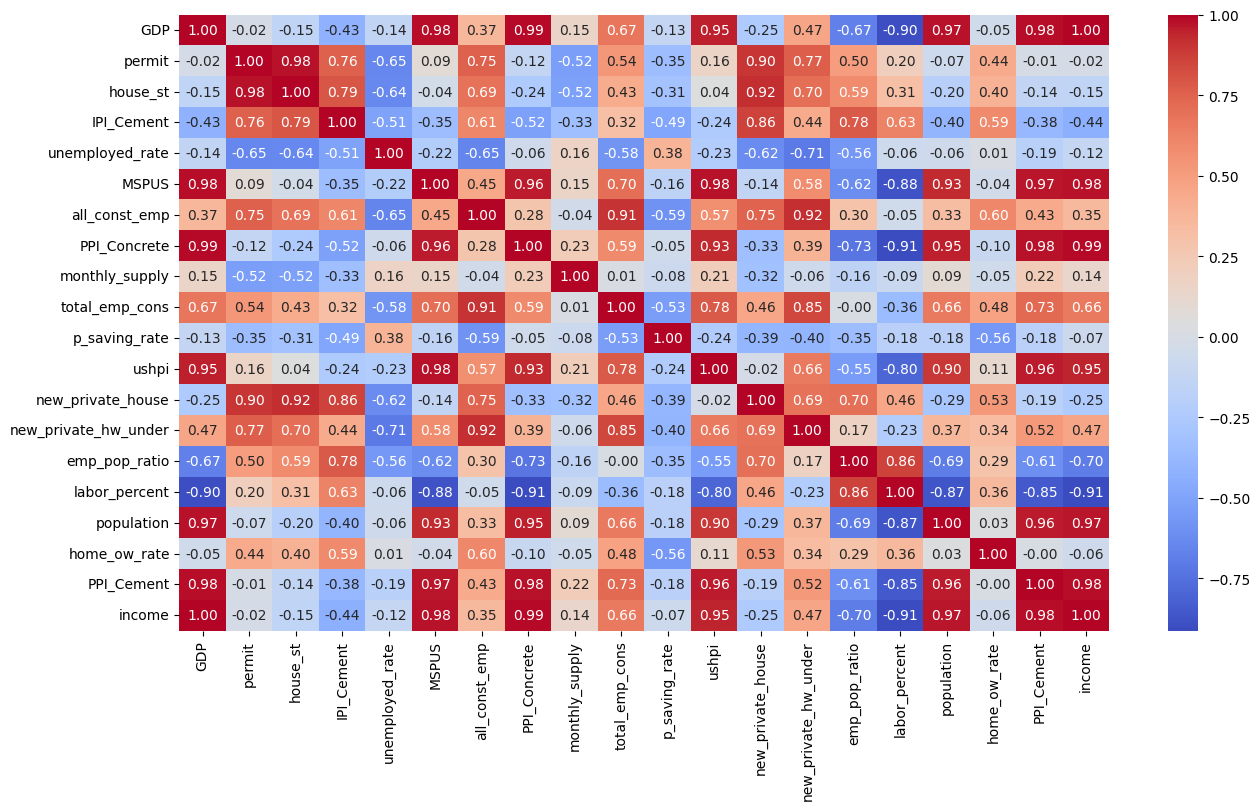

In [ ]:
# Visualize correlations using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### **Highest Correlation:**

The variable with the highest correlation with the target variable ('USHPI') are MSPUS:0.976881, PPI_Cement:0.955342, GDP:0.952614, income:0.946638 & PPI_Concrete:0.929656. These features show a strong positive linear relationship with home prices.

### **Other Strong Correlations:**

population:0.895138, total_emp_cons:0.779245 also have strong positive correlations.

### **Moderate Correlations:**

new_private_hw_under:0.662241, all_const_emp:0.569529 have moderate positive correlations.

### **Lower Correlations:**

monthly_supply:0.213615,
permit:0.162787,
home_ow_rate:0.112943,
house_st:0.038691 have lower correlations.

In [ ]:
df_final.to_csv("df_final.csv")
from google.colab import files
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Training**

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It uses L1 regularization technique,  it is used when we have more features(like our problem) because it automatically performs feature selection.

LASSO regression model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. we have a large set of variables, but only a small number of them are truly important). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The main advantage of a LASSO regression model is that it has the ability to set the coefficients for features it does not consider interesting to zero. This means that the model does some automatic feature selection to decide which features should and should not be included on its own. This is why we choose LASSO regression for our model training.

In [1]:
#importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
dfc = pd.read_csv("df_final.csv")

In [4]:
dfc.head()

,Unnamed: 0,DATE,GDP,permit,house_st,IPI_Cement,unemployed_rate,MSPUS,all_const_emp,PPI_Concrete,...,p_saving_rate,ushpi,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
0,0,1990-01-01,5872.701,1748.0,1551.0,138.1363,5.4,123900.0,710.3,4.813809,...,7.9,76.527,1753.315723,891.0,63.2,66.8,248743.0,64.1,101.7,4783.8
1,1,1990-02-01,5872.701,1329.0,1437.0,134.7538,5.3,123900.0,707.3,4.813809,...,8.5,76.587,1567.879199,898.0,63.2,66.7,248920.0,64.1,101.7,4819.8
2,2,1990-03-01,5872.701,1246.0,1289.0,132.5115,5.2,123900.0,703.0,4.813809,...,8.3,76.790,1559.569834,885.0,63.2,66.7,249146.0,64.1,102.0,4842.7
3,3,1990-04-01,5960.028,1136.0,1248.0,127.1853,5.4,126800.0,692.5,4.813809,...,8.7,77.038,1544.140888,872.0,63.0,66.6,249436.0,63.9,102.5,4883.8
4,4,1990-05-01,5960.028,1067.0,1212.0,123.8842,5.4,126800.0,688.6,4.813809,...,8.7,77.297,1566.692084,858.0,63.1,66.6,249707.0,63.9,102.5,4889.5


In [5]:
df = dfc.copy()

## **Data splitting and Scaling**

In this project, we employed the **Lasso regression** model due to indications of significant collinearity in the dataset. The Lasso regression model is known for its ability to handle collinearity by applying L1 regularization, which encourages sparsity in feature coefficients.


In [28]:
#data preparation
X = df.drop(columns=['DATE', 'ushpi'], axis=1)
y = df.ushpi

#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#data scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Lasso regression with cross-validation to find the optimal regularization parameter 'alpha'
lasso_cv_model = LassoCV(alphas=np.logspace(-2, 2, 100),cv=8, max_iter=20000, tol=0.001)
lasso_cv_model.fit(X_train, y_train)

#making predictions
lasso_cv_predictions = lasso_cv_model.predict(X_test)
#'alpha_' attribute stores the optimal alpha selected by cross-validation
optimal_alpha = lasso_cv_model.alpha_

#evaluating performance
mse = mean_squared_error(y_test, lasso_cv_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_cv_predictions)

#print results
print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0100
Mean Squared Error (MSE): 21.25
RMSE: 4.609395
R-squared (R2): 0.99


Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.

In cross-validation, we do more than one split. Here we have done  5 number of splits or partitions or folds of the data. We run the analysis on each fold, and then average the overall error estimate.

In [30]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=8, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99540962 0.9930768  0.99603814 0.99374723 0.99470933 0.99493974
 0.99630378 0.99449389]


In [31]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9948
Standard Deviation of R-squared: 0.0010


In [32]:
print(0.1 * rmse)
print(0.1 * df['ushpi'].mean()) # rmse should be less than the 10% of mean of target variable

0.46093950099688397
14.507166246851384


### **Most Prominent features and least prominent features**

 Lasso Regression is unique in that it not only regularizes the model but can also be used for feature selection. As it adds an L1 penalty term, it tends to drive the coefficients of some features to zero. This means that some features are effectively ignored in the final model, which simplifies it and reduces the risk of overfitting.

In [33]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

positive_coefficients_df = coefficients_df[coefficients_df['Coefficient'] > 0]
negative_coefficients_df = coefficients_df[coefficients_df['Coefficient'] < 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [34]:
positive_coefficients_df

,Feature,Coefficient
0,Unnamed: 0,46.245064
1,GDP,31.190392
2,permit,2.278178
3,house_st,0.698668
4,IPI_Cement,0.964369
5,unemployed_rate,4.084486
6,MSPUS,16.748677
7,all_const_emp,17.377158
8,PPI_Concrete,2.755670
9,monthly_supply,4.823950


In [35]:
negative_coefficients_df

,Feature,Coefficient
10,total_emp_cons,-3.256849
11,p_saving_rate,-1.729114
14,emp_pop_ratio,-10.213806
16,population,-46.339535
17,home_ow_rate,-1.116442
19,income,-3.565933


In [36]:
zero_coefficients_df

,Feature,Coefficient
18,PPI_Cement,-0.0


These coefficients represent the impact of each feature on the prediction of home prices. Positive coefficients indicate a direct relationship with home prices, while negative coefficients suggest an inverse relationship & zero coefficients indicates that they do not significantly impact the prediction of home prices.

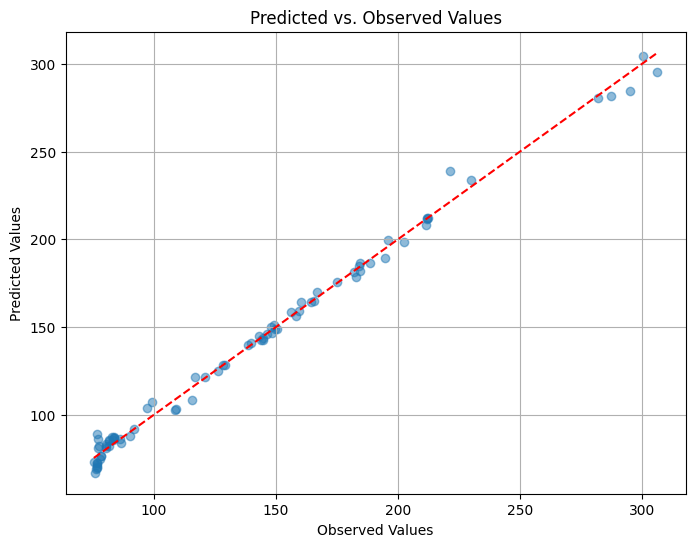

In [37]:
#Plotting the model through scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Adding a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

### **Conclusion:**

1. The points cluster closely around the diagonal reference line (the red dashed line), it suggests that the model's predictions closely match the observed values. This alignment indicates good performance.
2. The scatter plot shows a clear, linear relationship along the diagonal line, it indicates that the model captures the underlying patterns in the data well.
3. In data processing phase, deviations, outliers, or systematic patterns was carefully examined to understand areas for improvement in the model.
3. Mean R-squared is 0.9948 & Standard Deviation of R-squared is 0.0010.

In [ ]:
#Serializing using pickle
import pickle
df.to_pickle('data.pkl')
from google.colab import files
files.download('data.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>